In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Uppgift 1

Vi beräknar integralen för $f(x) = (1+x)^{-\frac{1}{2}}$ på intervallet $x \in [0,1]$. Vi beräknar integralen dels med hjälp av monte carlo samt dels med trapeziod regeln för att approximera interalen.

In [3]:
def trapezoidal_integration(f, a, b, n):
    h = (b-a)/n
    x = np.linspace(a, b, n+1)
    y = f(x)
    return x, y, h*(np.sum(y) - (y[0] + y[-1])/2)

def monte_carlo_integration(f, a, b, n):
    x = np.random.uniform(a, b, n)
    y = f(x)
    return x, y, (b-a)*np.mean(y) #volume 1d = b-a 

def f(x):
    return (x+1)**-(1/2)

def error(f, a, b, n_low, n_high,exact):
    trap = []
    monte = []
    for i in range(n_low, n_high):
        x, y, I = trapezoidal_integration(f, a, b, i)
        x2, y2, I2 = monte_carlo_integration(f, a, b, i)
        trap.append(abs(I-exact))
        monte.append(abs(I2-exact))
    return trap, monte

def plot_error(trap,monte, n_low, n_high):
    x = np.linspace(n_low, n_high, n_high-n_low)
    plt.subplot(1, 2, 1)
    plt.plot(x,trap)
    plt.title('Trapezoidal Integration')
    
    plt.subplot(1, 2, 2)
    plt.plot(x,monte)
    plt.title('Monte Carlo Integration')
    plt.show


def two_subplots(x1,y1,e1,x2,y2,e2):
    plt.subplot(1, 2, 1)
    plt.plot(x1,y1)
    plt.axhline(y=e1, color='r', linestyle='-')
    plt.text(0.6,e1+0.01, 'I = ' + str(round(e1,5)), color='red')
    plt.title('Trapezoidal Integration')
    
    plt.subplot(1, 2, 2)
    plt.plot(x2,y2)
    plt.axhline(y=e2, color='r', linestyle='-')
    plt.text(0.6,e2+0.01, 'I = ' + str(round(e2,5)), color='red')
    plt.title('Monte Carlo Integration')

In [39]:
upper_bound = 1
lower_bound = 0
number_of_points = 100
exact = 0.82842712474
n_low = 10
n_high = 100

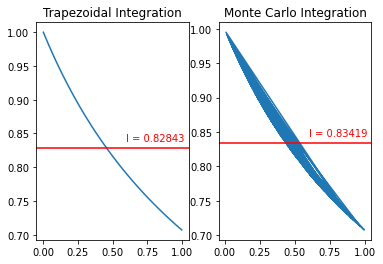

In [40]:
a = trapezoidal_integration(f, lower_bound, upper_bound, number_of_points)
b = monte_carlo_integration(f, lower_bound, upper_bound, number_of_points)
two_subplots(*(a+b))

6.190381540704948e-12


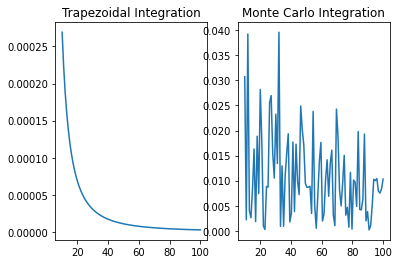

In [18]:
c = error(f, lower_bound, upper_bound, n_low, n_high, exact)
plot_error(*c, n_low, n_high)
print(trapezoidal_integration(f, lower_bound, upper_bound, 10000000)[2]-exact)


*För monte carlo integrationen är felet ganska oberoende av antalet steg medans för trapeziod $\newline$ itnergraton beror felet av analet steg samt konvergerar mot 0*

# Uppgift 2

*Vi använder Monte Carlo-metoden för att uppskatta priset på en köpoption när räntan är noll, där utbetalningen av optionen ges av $\mathbb{E}[\max(S_T - K, 0) | S_0 = s]$. Det förväntade värdet kan approximeras genom att generera N slumpmässiga banor för aktiepriset, $S_T[n]$, och ta det högsta värdet av varje bana minus strejkpriset K, om det är positivt. Det uppskattade värdet av optionspriset är sedan genomsnittet av alla dessa maximala värden.*

*Aktiepriset vid tidpunkten $T$, som betecknas $S_T[n]$, simuleras med ekvationen $S_T[n]$ = $e^{-\frac{\sigma^2T}{2} + \sigma W_T[n]}$, där $\sigma$ är aktieprisets volatilitet, $T$  är tiden till förfall, och $W_T[n]$ är en normalfördelad slumpvariabel med medelvärdet noll och varians lika med T.*

*Sammanfattningsvis kan vi använda Monte Carlo-simulering för att uppskatta priset på en köpoption när räntan är noll genom att generera N slumpmässiga banor för aktiepriset med hjälp av ovanstående ekvation, beräkna det högsta värdet av varje bana minus strejkpriset K, och sedan ta medelvärdet av dessa maximala värden för att erhålla det uppskattade optionspriset.*

In [6]:
def s_n(T,volatility,s,N):
    return s*np.exp(-(T/2)*volatility**2 + volatility*np.random.normal(0,T,N))

def max_vector_sum(S_I,K):
    sum = 0
    for i in range(len(S_I)):
        sum += max(S_I[i] - K,0)
    return sum

def BS_solver(T,volatility,K,s,N):
    S_I = s_n(T,volatility,s,N)
    return max_vector_sum(S_I,K)/N

In [37]:
fixed_time = 1                  #t
volatility = 0.2                #sigma
fixed_price = 1.22              #K  
current_price = fixed_price     #s

In [38]:
a = BS_solver(fixed_time,volatility,fixed_price,current_price,100000)
print(a)

0.09809558561296977


*Med följande värden:*
- fixed_time = 1 
- volatility = 0.2 
- fixed_price = 1.22
- current_price = fixed_price

*Fås:*
- option value = 0.09731642727149341

# Uppgift 3

*P liknande sätt för förra uppgiften använder vi monte carlo metoden för att beräkna priset på en regnbågs-köp-på-maxoption som ges enligt* $E\left[\max\left(\max\left(S_1(T), S_2(T)\right) - K, 0\right) \bigg| S_1(0) = s_1, S_2(0) = s_2\right]$, *där* $S_i(T) = e^{-\frac{\sigma^2T}{2} + \sigma W_i(T)}s_i$. $\newline$ *För att utvärdera hur antalet dimensioner påverkar noggranheten så gör vi flera stickprov vid olika dimensioner och beräknar standardavvikelserna för stickproven.*

In [8]:
def s_i(T,std_dev,s,N):
    S = np.zeros((len(s),N))
    for i in range(len(s)):
        S[i,:] = s[i]*np.exp((-T/2)*std_dev**2 + std_dev*np.random.normal(0,std_dev,N))
    return S

def vector_max(S):
    return np.max(S, axis=0) 

def max_vector_sum(S_I,K):
    sum = 0
    for i in range(len(S_I)):
        sum += max(S_I[i] - K,0)
    return sum

def BS_rainbow(T,std_dev,K,s_0,N):
    S_T = s_i(T,std_dev,s_0,N)
    S_T_max = vector_max(S_T)
    return max_vector_sum(S_T_max,K)/N

def stdandard_deviation(vector):
    average = np.mean(vector)
    return (np.sum((vector - average)**2)/(len(vector)-1))**(1/2)

def test_BS_rainbow(dimensions,strike_time,std_dev,strike_price,iteration,samples):
    s_0 = np.array([1])
    values = np.empty(dimensions)
    for i in range(dimensions):
        s_0 =np.linspace(1,2,i+1)
        s_0 = np.append(s_0,1)
        res = []
        for j in range(samples):
            res.append(BS_rainbow(strike_time,std_dev,strike_price,s_0,iteration))

        values[i] = stdandard_deviation(res)
    return values

def plot_std_dev(values):
    dim = np.arange(1,len(values)+1)
    plt.plot(dim,values)
    plt.title('Standard deviation of BS_rainbow')
    plt.xlabel('Dimensions')
    plt.ylabel('Standard deviation')
    plt.show()


In [35]:
fixed_time = 1                  #T
fixed_price = 1.22              #k
volatility  = 0.2               #sigma
current_price = [1,2]   #s_0
numer_of_iterations = 1000      #N
dimension = 100              #d

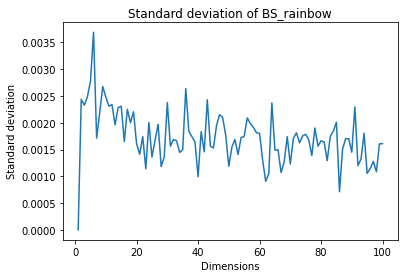

In [36]:
a = BS_rainbow(fixed_time,volatility,fixed_price,current_price,numer_of_iterations)
value = test_BS_rainbow(dimension,fixed_time,volatility,fixed_price,numer_of_iterations,10)
plot_std_dev(value)

*Alltså verkar det inte som att antalet dimensioner påverkar noggranheten*

# Uppgift 4


*black-schouls med nollränta fås av*

### $\frac{\partial f(s,t)}{\partial t} + \frac{\sigma^2 s^2}{2} \frac{\partial^2 f(s,t)}{\partial s^2} = 0$

*då $(s,t) = (m\Delta s,n\Delta t)$ får vi vidare med finit differensmetod*

### $\frac{\partial f(m\Delta s, n\Delta t)}{\partial \Delta t} + \frac{(\sigma {m \Delta s})^2}{2} \frac{\partial^2 f(m\Delta s, n\Delta t)}{\partial \Delta s^2}$

*För mindre värden på $\Delta s, \Delta t$ kan vi skriva*

### $\frac{\partial f(m\Delta s, n\Delta t)}{\partial \Delta t} \approx \frac{f(m\Delta s, n\Delta t + \Delta t ) - f(m\Delta s, n\Delta t )}{\Delta t}  \approx \frac{f(m\Delta s, n\Delta t ) - f(m\Delta s, n\Delta t - \Delta t)}{\Delta t} $

### $= \frac{f(m\Delta s, n\Delta t ) - f(m\Delta s, (n - 1) \Delta t)}{\Delta t}$

### $\frac{\partial f^2(m\Delta s, n\Delta t)}{\partial \Delta s^2} \approx \frac{f(m\Delta s + \Delta s, n\Delta t) - 2f(m\Delta s, n\Delta t) - f(m\Delta s - \Delta s, n\Delta t)}{\Delta t}$

### $= \frac{f((m + 1)\Delta s , n\Delta t) - 2f(m\Delta s, n\Delta t) - f((m - 1)\Delta s, n\Delta t)}{\Delta t}$

*Med felen*

$e_{\Delta s} = c_{\Delta s} \Delta s ^2$ 

$e_{\Delta t} = c_{\Delta t} \Delta t ^2$

*Om vi fixar $\Delta S$ samt $\Delta t$ diskretiseras funktion som:*

$\tilde{f}(m,n) := f(m\Delta s,n\Delta t)$

*Insättning i Black-Schoels med nollränta ger:*

### $\frac{\tilde{f}(m, n ) - \tilde{f}(m, n - 1)}{\Delta t}  + \frac{(\sigma {m \Delta s})^2}{2} \frac{\tilde{f}(m + 1 , n) - 2\tilde{f}(m, n) - \tilde{f}(m - 1 , n)}{(\Delta s) ^2 } = 0 $


### $\{ m\Delta s = s \}$,$\quad \{ \alpha = \frac{(\sigma {s})^2}{2} \}$

### $\implies \frac{\tilde{f}(m, n ) - \tilde{f}(m, n - 1)}{\Delta t}  + \frac{(\sigma {s})^2}{2} \frac{\tilde{f}(m + 1 , n) - 2\tilde{f}(m, n) - \tilde{f}(m - 1 , n)}{(\Delta s) ^2 } = 0$

# Uppgift 5

*Vi skriver om:*

 ### $\frac{\tilde{f}(m, n ) - \tilde{f}(m, n - 1)}{\Delta t}  + \frac{(\sigma {s})^2}{2} \frac{\tilde{f}(m + 1 , n) - 2\tilde{f}(m, n) - \tilde{f}(m - 1 , n)}{(\Delta s) ^2 } = 0 $
 ### $\implies \tilde{f}(m, n - 1 ) =  \tilde{f}(m, n)  +  \Delta t \frac{(\sigma {s})^2}{2} \frac{\tilde{f}(m + 1 , n) - 2\tilde{f}(m, n) - \tilde{f}(m - 1 , n)}{(\Delta s) ^2 }$

För att iterativt kunna lösa ekvatonen behöver vi utnyttja både sluttids-villkoren $\newline$ $\tilde{f}(m,N) = max(K - m\Delta s,o) $ och randvvillkoren: $f(0,t) = k$, $f(\alpha K, t) = 0$ 

*Eftersom vi har att:*

### $\{s_1 \le m \Delta s \le s_2\}$

*Vill vi bestämma $S_1$ och $S_2$ enligt randvillkoren:*

$ f(S_2^{\prime}, t) = 0 \quad S_2^{\prime} = (m_{s_2} + 1)\Delta s$ 

$ f(S_1^{\prime}, t) = k \quad S_1^{\prime} = (m_{s_1} - 1)\Delta s = 0$ 

*Vi kan nu lösa ekvationen och bestämma $f(s_1,t)$ och $f(s_2,t)$,   $\forall t \in \{[0, T] \cap \mathbf{N}\}$ genom att $\newline$ iterera  baklänges över tid $n$ samt för varje iteration i tid iterera från $m_{s_1}$ till $m_{s_2}$*

*Vi noterar slutligen att black and scholes med nolllränta motvarar en variant av värmeekvationen som känt ger stabilitet då:*

### $ \frac{(\sigma {s})^2}{2} \frac{ \Delta t}{\Delta s^2} \le \frac{1}{2}   \quad  \forall s$

### $\implies  \frac{(\sigma {s_2})^2}{2} \frac{ \Delta t}{\Delta s^2} \le \frac{1}{2}$

In [10]:
def time_vector(time_steps,dt):
    vec = np.empty(time_steps)
    for i in range(time_steps):
        vec[i] = i*dt
    return vec

def price_vector(price_steps,ds):
    vec = np.empty(price_steps+1)
    for i in range(price_steps+1):
        vec[i] = i*ds
    return vec

def get_end_values(strike_price,price_steps,ds):
    inital_value = np.empty(price_steps+2)
    for i in range(1,price_steps+1):
        inital_value[i] = max(strike_price-ds*i,0)
    return inital_value

def get_top_boundary_values(time_steps, strike_price):
    top_boundary_values = np.zeros(time_steps)
    top_boundary_values.fill(strike_price)
    return top_boundary_values


def get_bottom_boundary_values(time_steps):
    bottom_boundary_values = np.zeros(time_steps)
    bottom_boundary_values.fill(0)
    return bottom_boundary_values

def stability_condition(volatility,price_vector,ds,dt):
    return (volatility*price_vector[-1]/ds)**2*dt <= 1/2

def BS_difference_method_solver(strike_price,volatility,price_steps,time_steps,ds,dt):
    solution = np.zeros((price_steps+2,time_steps))
    time_axis = time_vector(time_steps,dt)
    price_axis = price_vector(price_steps,ds)
    solution[:,-1] = get_end_values(strike_price,price_steps,ds)
    solution[-1,:] = get_bottom_boundary_values(time_steps)
    solution[0,:] = get_top_boundary_values(time_steps, strike_price)
    for t in range(time_steps-1,0,-1):
        for s in range(1 ,price_steps+1):
            solution[s,t-1] = solution[s,t] + time_axis[t]/2*(volatility*price_axis[s]/ds)**2*(solution[s+1,t] - 2*solution[s,t] + solution[s-1,t])
    
    stability = stability_condition(volatility,price_axis,ds,dt)
    return solution, stability, time_axis, price_axis


In [30]:
def three_d_plot_solution(solution):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    x = np.arange(0, solution.shape[1])
    y = np.arange(0, solution.shape[0])
    X, Y = np.meshgrid(x, y)
    ax.plot_surface(X, Y, solution)
    ax.view_init(30, 45)
    plt.show()


In [41]:
strike_price = 1.22
volatility = 0.2
max_price = 1
max_time = 1
price_steps = 8
time_steps = 8
ds = max_price/price_steps
dt = max_time/time_steps

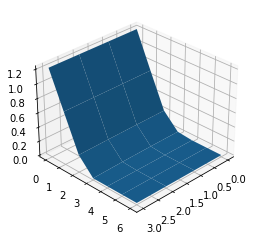

Stability:  True


In [34]:
sol, stab, times, prices = BS_difference_method_solver(strike_price,volatility,price_steps,time_steps,ds,dt)
three_d_plot_solution(sol)
print("Stability: ", stab)

*För att beräkna noggrannheten av våran approximation kan vi använda att om vi sätter $\newline$ sätter ett litet nog värde för $\Delta s$ och $\Delta t$ får vi enligt derivatans defenition ett exakt värde.*

In [ ]:
def get_errors(solution,analytical_solution):
    sol = solution[0,:]
    ana = analytical_solution[0,:]
    er = 0
    
    for i in range(1,len(solution)):
        er = np.sum((sol - ana)**2)/len(solution[0,:])

    return er

In [ ]:
def get_solutions(fixed_time,upper_price_limit,fixed_price,volatility,delta_s,delta_t,m_start, m_max):
    analytical_solution = analytical_solution = BS_difference_method_solver(fixed_time,upper_price_limit,fixed_price,volatility,1000,delta_s,delta_t)
    error_axis = np.empty(m_max-m_start)
    
    for m in range(m_start,m_max):
        solution = BS_difference_method_solver(fixed_time,upper_price_limit,fixed_price,volatility,m,delta_s,delta_t)
        np.append(error_axis,get_errors(solution,analytical_solution))
    return error_axis

In [ ]:
def plot_error(error,m_start,m_max):
    x = np.arange(m_start,m_max)
    plt.plot(x,error)
    plt.show()

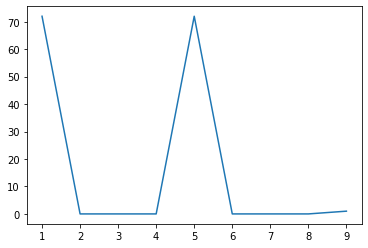

In [ ]:
strike_price = 1.22
volatility = 0.2
price_steps = 5
time_steps = 4
ds = 0.5
dt = 0.1

a = BS_difference_method_solver(strike_price,volatility,price_steps,time_steps,ds,dt)

error_axis = get_solutions(fixed_time,upper_price_limit,fixed_price,volatility,delta_s,delta_t,m_start,m_max)
plot_error(error_axis,m_start,m_max)

### Felkällor

Den antagligen största felkällan är approximationen av derivatorna med finita differensmetoden. Felet är proportionelig mot $\Delta s^2 + \Delta t^2$. Eftersom $\Delta s^2$ , $ \Delta t^2$ beror på $s_2$ och $m_{tot}$ samt $\sigma$ beror även felet på det. 